In [1]:
pip install pygooglenews --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pygooglenews import GoogleNews
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

gn = GoogleNews(lang = 'en')

In [3]:
"""defining function which collect google news 
    on USDC for a selected period of time"""


def get_news(search):
    stories = []
    start_date = datetime.date(2023,9,1)
    end_date = datetime.date(2023,9,30)
    delta = datetime.timedelta(days = 1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        news_result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = news_result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories

df = pd.DataFrame(get_news('allintext:"USDC"'))

In [4]:
"""adding column with a date in required format"""
df['Date'] = pd.to_datetime(df.published)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [5]:
df.head()

,title,link,published,Date
0,The Incredible Shrinking Market Share of Circl...,https://news.google.com/rss/articles/CBMiRmh0d...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01
1,Circle partners with Mercado Pago to launch US...,https://news.google.com/rss/articles/CBMiamh0d...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01
2,Stablecoins Can Provide an Escape From High-In...,https://news.google.com/rss/articles/CBMigwFod...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01
3,Balancer protocol exploited for $900K as DeFi ...,https://news.google.com/rss/articles/CBMiaWh0d...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01
4,Robinhood Buys Back Sam Bankman-Fried’s Seized...,https://news.google.com/rss/articles/CBMiTWh0d...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01


In [6]:
"""from df which contaions news mentioning USDCS, selecting news related to scam activity"""
Scam_titles = df[df['title'].str.contains('scam|stolen|attack|phishing|hack', case=False, regex=True)]
Scam_titles

,title,link,published,Date
3,Balancer protocol exploited for $900K as DeFi ...,https://news.google.com/rss/articles/CBMiaWh0d...,"Fri, 01 Sep 2023 07:00:00 GMT",2023-09-01
82,Withdrawals Halted at Stake.com As Crypto Casi...,https://news.google.com/rss/articles/CBMic2h0d...,"Mon, 04 Sep 2023 07:00:00 GMT",2023-09-04
87,Stake.com habría sufrido un hackeo de USD 16 m...,https://news.google.com/rss/articles/CBMiZmh0d...,"Mon, 04 Sep 2023 07:00:00 GMT",2023-09-04
113,Hackathon global da Solana também acontece no ...,https://news.google.com/rss/articles/CBMiggFod...,"Mon, 04 Sep 2023 07:00:00 GMT",2023-09-04
135,Stake se fait hacker et perd 40 millions de do...,https://news.google.com/rss/articles/CBMiKmh0d...,"Mon, 04 Sep 2023 07:00:00 GMT",2023-09-04
...,...,...,...,...
2156,8 of the biggest crypto hacks ever - finder.co...,https://news.google.com/rss/articles/CBMiLmh0d...,"Wed, 27 Sep 2023 07:00:00 GMT",2023-09-27
2217,Is FBI Negotiating With Mixin Network Hackers?...,https://news.google.com/rss/articles/CBMiOGh0d...,"Wed, 27 Sep 2023 07:00:00 GMT",2023-09-27
2219,Exploring Crypto Ecommerce Payment Solutions i...,https://news.google.com/rss/articles/CBMiS2h0d...,"Wed, 27 Sep 2023 07:00:00 GMT",2023-09-27
2283,U.S. Authorities Hunt for Stolen Crypto in Pig...,https://news.google.com/rss/articles/CBMiPWh0d...,"Thu, 28 Sep 2023 07:00:00 GMT",2023-09-28


In [7]:
"""counting amount of USDC mentioning artictes per day"""
df_daily = df.groupby('Date').agg(['count']).reset_index()
df_daily = df_daily.drop(columns=['link', 'published'])
df_daily.rename(columns={'title': 'USDC_mentions'}, inplace=True)
df_daily

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:3884: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Date,USDC_mentions
,,count
0,2023-09-01,19
1,2023-09-02,7
2,2023-09-03,33
3,2023-09-04,97
4,2023-09-05,94
5,2023-09-06,106
6,2023-09-07,90
7,2023-09-08,101
8,2023-09-09,80


In [8]:
"""counting amount of Scam-related artictes per day"""

df_scam = Scam_titles.groupby('Date').agg(['count']).reset_index()
df_scam = df_scam.drop(columns=['link', 'published'])
df_scam.rename(columns = {'title': 'Scam_mentions'}, inplace=True)
df_scam

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:3884: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Date,Scam_mentions
,,count
0,2023-09-01,1
1,2023-09-04,6
2,2023-09-05,5
3,2023-09-06,1
4,2023-09-07,1
5,2023-09-08,3
6,2023-09-09,3
7,2023-09-10,6
8,2023-09-11,3


In [9]:
df_merged = df_daily.merge(df_scam, on='Date')
df_merged.reset_index()

,index,Date,USDC_mentions,Scam_mentions
,,,count,count
0,0,2023-09-01,19,1
1,1,2023-09-04,97,6
2,2,2023-09-05,94,5
3,3,2023-09-06,106,1
4,4,2023-09-07,90,1
5,5,2023-09-08,101,3
6,6,2023-09-09,80,3
7,7,2023-09-10,82,6
8,8,2023-09-11,115,3


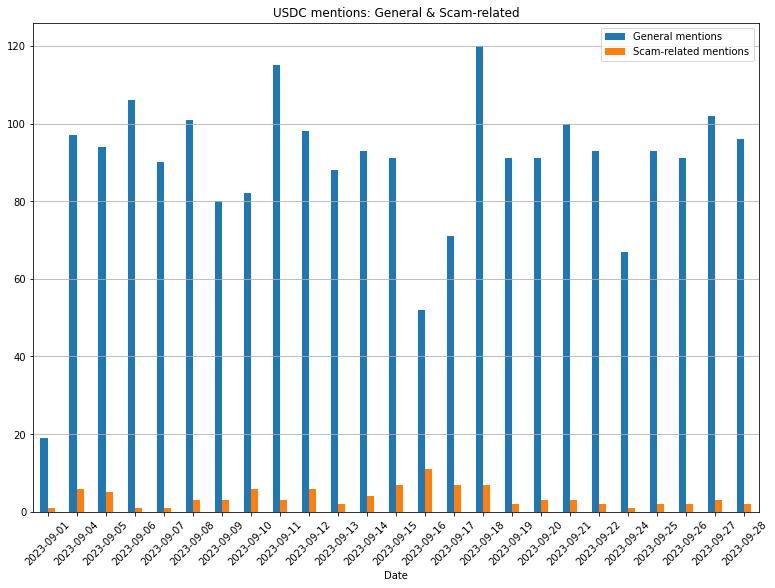

In [10]:
"""plotting a bar plot which shows USDC mentions and Scam-related mentions per day"""
df_merged.plot(x ='Date', y = ['USDC_mentions', 'Scam_mentions'], kind="bar", \
               title = "USDC mentions: General & Scam-related", rot = 45, figsize = (13,9)).grid(axis = 'y')
plt.legend(["General mentions", "Scam-related mentions"]);
plt.show()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


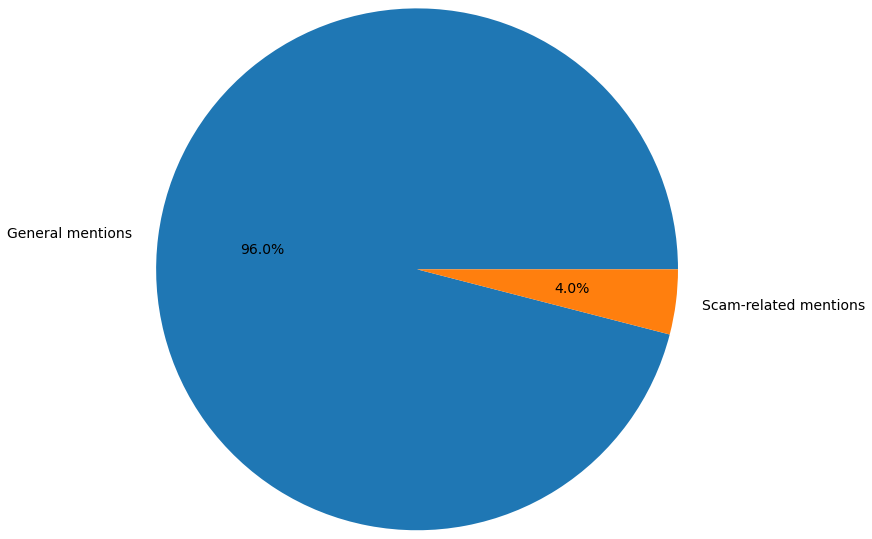

In [11]:
""" Create a list of values for the pie chart """
values = [df_merged['USDC_mentions'].sum(), df_merged['Scam_mentions'].sum()]

""" Create a list of labels for the pie chart """
labels = ['General mentions', 'Scam-related mentions']

""" Create the pie chart to vizualize proportion of Scam-related mentions and USDC General mentions"""
plt.pie(values, labels=labels, autopct='%.1f%%', textprops={'fontsize': 14}, radius=3)

plt.show()